In [1]:
import networkx as nx

真实网络的集聚系数与度之间的依赖关系（以科学合作网络为例）

In [2]:
def C_vs_k(G):
    klist = [G.degree(i) for i in G.nodes()]
    # 计算每个节点的集聚系数
    all_C = {i: nx.clustering(G, i) for i in G.nodes()}
    all_k = list(set(klist)) # 所有可能的度值

    # 计算度值为k的节点的集聚系数的平均值
    C_k = {}
    for k in sorted(all_k):
        s = 0
        j = 0
        for i in G.nodes():
            if G.degree(i) == k:
                j = j + 1
                s = s + all_C[i]
        avc_k = s/j
        C_k[k] = avc_k
    
    return C_k

In [3]:
import pandas as pd
df = pd.read_csv("citation.csv")
G = nx.from_pandas_edgelist(df, "source", "target", create_using=nx.Graph())
len(G.nodes())

23133

In [4]:
import numpy as np
C_k = C_vs_k(G)
avC = nx.average_clustering(G)
print(avC)
x = np.linspace(1, 10000, 10000)
y = [avC] * 10000

0.6334130270820665


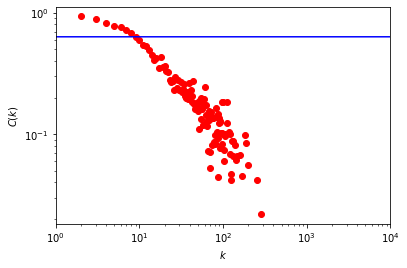

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(list(C_k.keys()), list(C_k.values()), "ro")
plt.plot(x, y, "b-")
plt.xlabel("$k$")
plt.ylabel("$C(k)$")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1, 1e4])
plt.savefig("C(k)_k_citation.png", dpi=600)